In [1]:
# Data handling and loading
import numpy as np
import pandas as pd
#import datatable as dt
from datetime import datetime, timedelta # To calculate year difference
#from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from meteostat import Point, Daily, Stations # Weather

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Modelling
#from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV, GridSearchCV, cross_val_score
#from xgboost import XGBClassifier
#from sklearn.linear_model import LogisticRegression
import time
# import shap
# from mlxtend.classifier import StackingCVClassifier # ensemble

# warninghandler
import warnings

from data.base import get_data, get_test_data

In [2]:
data = get_data()
test_data = get_test_data()

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [3]:
data

,transactionLocal_VAT_beforeDiscount,hour,zip_code,temp,feelslike,precip,precipprob,cloudcover,solarradiation,Holiday Name_Ascension Day,...,week_53,week_6,week_7,week_8,week_9,year_2018,year_2019,year_2020,year_2021,year_2022
transaction_hour,,,,,,,,,,,,,,,,,,,,,
2019-01-01 01:00:00,37912.48,1,1456,7.5,3.2,0.16,100.0,94.5,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2019-01-01 01:00:00,5832.01,1,1123,7.5,3.2,0.16,100.0,94.5,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2019-01-01 01:00:00,37317.00,1,1456,7.5,3.2,0.16,100.0,94.5,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2019-01-01 01:00:00,3610.39,1,1165,7.5,3.2,0.16,100.0,94.5,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2019-01-01 01:00:00,1734.50,1,1456,7.5,3.2,0.16,100.0,94.5,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-20 05:00:00,1128.00,5,1117,11.8,11.8,0.00,0.0,88.9,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2022-05-20 05:00:00,-11500.00,5,1159,11.8,11.8,0.00,0.0,88.9,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2022-05-20 05:00:00,0.00,5,1165,11.8,11.8,0.00,0.0,88.9,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
data.isnull().sum()

transactionLocal_VAT_beforeDiscount    0
hour                                   0
zip_code                               0
temp                                   0
feelslike                              0
                                      ..
year_2018                              0
year_2019                              0
year_2020                              0
year_2021                              0
year_2022                              0
Length: 228, dtype: int64

In [36]:
master_weather_data['datetime'] = pd.to_datetime(master_weather_data['datetime'])

In [37]:
master_transactions['transaction_hour'] = pd.to_datetime(master_transactions['transaction_hour'])

<AxesSubplot:xlabel='date_rekom'>

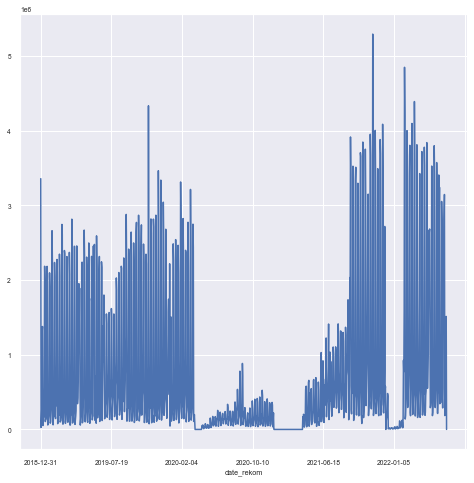

In [42]:
sns.set(font_scale = 0.6)
plt.figure(figsize = (8, 8))
master_transactions.groupby(['date_rekom'])['transactionLocal_VAT_beforeDiscount'].sum().plot()

# Modeling

In [145]:
split = int(len(data) * 0.8)
#data = pd.get_dummies(data)
train_encoded = data#pd.get_dummies(data)
train_encoded = train_encoded[train_encoded["transactionLocal_VAT_beforeDiscount"] < 500000]
train_encoded = train_encoded[train_encoded["transactionLocal_VAT_beforeDiscount"] > 0]
train_y = train_encoded['transactionLocal_VAT_beforeDiscount'][:split]
train_x = train_encoded[:split].drop(['transactionLocal_VAT_beforeDiscount'], axis = 1)
val_y = train_encoded['transactionLocal_VAT_beforeDiscount'][split:]
val_x = train_encoded[split:].drop(['transactionLocal_VAT_beforeDiscount'], axis = 1)

# XGBoost

In [146]:
from xgboost import XGBRegressor
model = XGBRegressor(use_label_encoder=False)

train_y = train_encoded['transactionLocal_VAT_beforeDiscount']
train_x = train_encoded.drop(['transactionLocal_VAT_beforeDiscount'], axis = 1)
model.fit(train_x, train_y, eval_metric = "rmse")
pred_xgb = model.predict(train_x)

In [149]:
MSE = mean_squared_error(pred_xgb, train_y)
r2 = r2_score(pred_xgb, train_y)

print("MSE: ", np.sqrt(MSE))
print("R^2: ", r2)

MSE:  3960.915119632068
R^2:  0.647287955365766


In [148]:
pred_xgb[pred_xgb<0] = 0

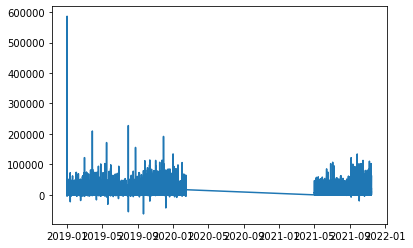

In [12]:
plt.plot(train_y)

In [14]:
train_y.max()

586255.0

# Hypertuning

In [43]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe #hyper parameter tuning
x_train = train_x
y_train = train_y
x_test = val_x
y_test = val_y

In [25]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40, 180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0.01, 0.99),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.01,0.8),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'eta': hp.uniform('eta', 0.01, 0.11),
        'n_estimators': hp.quniform('n_estimators', 50, 250, 1),
        'subsample': hp.uniform('subsample', 0.01, 0.99),
        'seed': 0
    }

def objective(space):
    clf=XGBRegressor(
                    n_estimators = int(space['n_estimators']), max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']), eta=space['eta'],
                    reg_lambda = space['reg_lambda'], subsample = space['subsample'],
    early_stopping_rounds = 20)
    
    evaluation = [( x_train, y_train), (x_test, y_test)]
    
    clf.fit(x_train, y_train,
            eval_set=evaluation, eval_metric='logloss',verbose=False)
    

    pred = clf.predict(x_test)
    accuracy = mean_squared_error(y_test, pred)
    print("SCORE:", np.sqrt(accuracy))
    return {'loss': np.sqrt(accuracy), 'status': STATUS_OK }

trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

print("The best hyperparameters are : ","\n")
print(best_hyperparams)

SCORE:                                                                                                                                                                                                       
9813.960385867143                                                                                                                                                                                            
  1%|█▎                                                                                                                                     | 1/100 [00:05<08:33,  5.19s/trial, best loss: 9813.960385867143]

SCORE:                                                                                                                                                                                                       
9854.178250567127                                                                                                                                                                                            
  2%|██▋                                                                                                                                    | 2/100 [00:08<06:22,  3.90s/trial, best loss: 9813.960385867143]

SCORE:                                                                                                                                                                                                       
9356.480794299929                                                                                                                                                                                            
  3%|████                                                                                                                                   | 3/100 [00:14<08:13,  5.09s/trial, best loss: 9356.480794299929]

SCORE:                                                                                                                                                                                                       
9540.388852547849                                                                                                                                                                                            
  4%|█████▍                                                                                                                                 | 4/100 [00:20<08:54,  5.56s/trial, best loss: 9356.480794299929]

SCORE:                                                                                                                                                                                                       
9837.709161710485                                                                                                                                                                                            
  5%|██████▊                                                                                                                                | 5/100 [00:23<07:15,  4.58s/trial, best loss: 9356.480794299929]

SCORE:                                                                                                                                                                                                       
9352.28747966338                                                                                                                                                                                             
  6%|████████▏                                                                                                                               | 6/100 [00:30<08:16,  5.28s/trial, best loss: 9352.28747966338]

SCORE:                                                                                                                                                                                                       
9949.986534529786                                                                                                                                                                                            
  7%|█████████▌                                                                                                                              | 7/100 [00:33<07:04,  4.56s/trial, best loss: 9352.28747966338]

SCORE:                                                                                                                                                                                                       
9532.948104862866                                                                                                                                                                                            
  8%|██████████▉                                                                                                                             | 8/100 [00:39<07:39,  4.99s/trial, best loss: 9352.28747966338]

SCORE:                                                                                                                                                                                                       
9318.630979845353                                                                                                                                                                                            
  9%|████████████▏                                                                                                                          | 9/100 [00:46<08:25,  5.56s/trial, best loss: 9318.630979845353]

SCORE:                                                                                                                                                                                                       
9753.838329331802                                                                                                                                                                                            
 10%|█████████████▍                                                                                                                        | 10/100 [00:50<07:38,  5.10s/trial, best loss: 9318.630979845353]

SCORE:                                                                                                                                                                                                       
9413.47188919348                                                                                                                                                                                             
 11%|██████████████▋                                                                                                                       | 11/100 [00:55<07:39,  5.16s/trial, best loss: 9318.630979845353]

SCORE:                                                                                                                                                                                                       
9824.045331675656                                                                                                                                                                                            
 12%|████████████████                                                                                                                      | 12/100 [00:57<06:17,  4.29s/trial, best loss: 9318.630979845353]

SCORE:                                                                                                                                                                                                       
9855.590835252826                                                                                                                                                                                            
 13%|█████████████████▍                                                                                                                    | 13/100 [01:04<07:22,  5.08s/trial, best loss: 9318.630979845353]

SCORE:                                                                                                                                                                                                       
9803.349874323161                                                                                                                                                                                            
 14%|██████████████████▊                                                                                                                   | 14/100 [01:08<06:31,  4.55s/trial, best loss: 9318.630979845353]

SCORE:                                                                                                                                                                                                       
9833.503978052086                                                                                                                                                                                            
 15%|████████████████████                                                                                                                  | 15/100 [01:10<05:42,  4.04s/trial, best loss: 9318.630979845353]

SCORE:                                                                                                                                                                                                       
9844.177779395417                                                                                                                                                                                            
 16%|█████████████████████▍                                                                                                                | 16/100 [01:13<05:10,  3.70s/trial, best loss: 9318.630979845353]

SCORE:                                                                                                                                                                                                       
9822.983166787413                                                                                                                                                                                            
 17%|██████████████████████▊                                                                                                               | 17/100 [01:21<06:44,  4.87s/trial, best loss: 9318.630979845353]

SCORE:                                                                                                                                                                                                       
10021.153179761595                                                                                                                                                                                           
 18%|████████████████████████                                                                                                              | 18/100 [01:25<06:05,  4.46s/trial, best loss: 9318.630979845353]

SCORE:                                                                                                                                                                                                       
9385.789620591982                                                                                                                                                                                            
 19%|█████████████████████████▍                                                                                                            | 19/100 [01:31<06:48,  5.05s/trial, best loss: 9318.630979845353]

SCORE:                                                                                                                                                                                                       
9679.103649538996                                                                                                                                                                                            
 20%|██████████████████████████▊                                                                                                           | 20/100 [01:35<06:26,  4.83s/trial, best loss: 9318.630979845353]

SCORE:                                                                                                                                                                                                       
9141.711231328409                                                                                                                                                                                            
 21%|████████████████████████████▏                                                                                                         | 21/100 [01:43<07:21,  5.59s/trial, best loss: 9141.711231328409]

SCORE:                                                                                                                                                                                                       
9126.731357472836                                                                                                                                                                                            
 22%|█████████████████████████████▍                                                                                                        | 22/100 [01:50<08:03,  6.20s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9339.8779782217                                                                                                                                                                                              
 23%|██████████████████████████████▊                                                                                                       | 23/100 [01:57<08:00,  6.24s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9477.93241433016                                                                                                                                                                                             
 24%|████████████████████████████████▏                                                                                                     | 24/100 [02:02<07:37,  6.02s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9163.342861592322                                                                                                                                                                                            
 25%|█████████████████████████████████▌                                                                                                    | 25/100 [02:10<08:25,  6.74s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9317.57985230072                                                                                                                                                                                             
 26%|██████████████████████████████████▊                                                                                                   | 26/100 [02:18<08:33,  6.94s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9690.845024118764                                                                                                                                                                                            
 27%|████████████████████████████████████▏                                                                                                 | 27/100 [02:24<08:02,  6.60s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9127.433350093717                                                                                                                                                                                            
 28%|█████████████████████████████████████▌                                                                                                | 28/100 [02:31<08:11,  6.83s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9433.486906786213                                                                                                                                                                                            
 29%|██████████████████████████████████████▊                                                                                               | 29/100 [02:37<07:43,  6.52s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9558.286789644953                                                                                                                                                                                            
 30%|████████████████████████████████████████▏                                                                                             | 30/100 [02:42<07:03,  6.05s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9369.058642755957                                                                                                                                                                                            
 31%|█████████████████████████████████████████▌                                                                                            | 31/100 [02:48<07:02,  6.13s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9718.403569197008                                                                                                                                                                                            
 32%|██████████████████████████████████████████▉                                                                                           | 32/100 [02:56<07:23,  6.52s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9674.134406828678                                                                                                                                                                                            
 33%|████████████████████████████████████████████▏                                                                                         | 33/100 [03:00<06:35,  5.91s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9238.144941275543                                                                                                                                                                                            
 34%|█████████████████████████████████████████████▌                                                                                        | 34/100 [03:08<07:03,  6.41s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9666.676544259428                                                                                                                                                                                            
 35%|██████████████████████████████████████████████▉                                                                                       | 35/100 [03:12<06:10,  5.70s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9397.311146004411                                                                                                                                                                                            
 36%|████████████████████████████████████████████████▏                                                                                     | 36/100 [03:17<06:00,  5.63s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9807.761112072016                                                                                                                                                                                            
 37%|█████████████████████████████████████████████████▌                                                                                    | 37/100 [03:20<04:58,  4.73s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9433.559366582162                                                                                                                                                                                            
 38%|██████████████████████████████████████████████████▉                                                                                   | 38/100 [03:26<05:24,  5.24s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9642.112821996116                                                                                                                                                                                            
 39%|████████████████████████████████████████████████████▎                                                                                 | 39/100 [03:34<05:59,  5.89s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9375.118124456023                                                                                                                                                                                            
 40%|█████████████████████████████████████████████████████▌                                                                                | 40/100 [03:40<05:58,  5.97s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9405.893537024971                                                                                                                                                                                            
 41%|██████████████████████████████████████████████████████▉                                                                               | 41/100 [03:47<06:17,  6.39s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9409.784124498356                                                                                                                                                                                            
 42%|████████████████████████████████████████████████████████▎                                                                             | 42/100 [03:54<06:17,  6.51s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9412.831525551683                                                                                                                                                                                            
 43%|█████████████████████████████████████████████████████████▌                                                                            | 43/100 [04:00<05:57,  6.27s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9583.55693429401                                                                                                                                                                                             
 44%|██████████████████████████████████████████████████████████▉                                                                           | 44/100 [04:04<05:25,  5.81s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9281.475477004255                                                                                                                                                                                            
 45%|████████████████████████████████████████████████████████████▎                                                                         | 45/100 [04:11<05:28,  5.98s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9644.283957684747                                                                                                                                                                                            
 46%|█████████████████████████████████████████████████████████████▋                                                                        | 46/100 [04:16<05:11,  5.77s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9668.715314138837                                                                                                                                                                                            
 47%|██████████████████████████████████████████████████████████████▉                                                                       | 47/100 [04:22<05:06,  5.78s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9197.3689180535                                                                                                                                                                                              
 48%|████████████████████████████████████████████████████████████████▎                                                                     | 48/100 [04:29<05:28,  6.31s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9515.605563761163                                                                                                                                                                                            
 49%|█████████████████████████████████████████████████████████████████▋                                                                    | 49/100 [04:34<04:53,  5.75s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9477.206799976526                                                                                                                                                                                            
 50%|███████████████████████████████████████████████████████████████████                                                                   | 50/100 [04:41<05:05,  6.10s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9889.492968504454                                                                                                                                                                                            
 51%|████████████████████████████████████████████████████████████████████▎                                                                 | 51/100 [04:44<04:23,  5.37s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9826.122040642575                                                                                                                                                                                            
 52%|█████████████████████████████████████████████████████████████████████▋                                                                | 52/100 [04:47<03:34,  4.47s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9459.200129770881                                                                                                                                                                                            
 53%|███████████████████████████████████████████████████████████████████████                                                               | 53/100 [04:52<03:44,  4.78s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9271.218086011972                                                                                                                                                                                            
 54%|████████████████████████████████████████████████████████████████████████▎                                                             | 54/100 [04:59<04:09,  5.42s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9326.492249394265                                                                                                                                                                                            
 55%|█████████████████████████████████████████████████████████████████████████▋                                                            | 55/100 [05:07<04:35,  6.12s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9284.963528400705                                                                                                                                                                                            
 56%|███████████████████████████████████████████████████████████████████████████                                                           | 56/100 [05:14<04:43,  6.45s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9473.017589405637                                                                                                                                                                                            
 57%|████████████████████████████████████████████████████████████████████████████▍                                                         | 57/100 [05:20<04:31,  6.30s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9589.73268889471                                                                                                                                                                                             
 58%|█████████████████████████████████████████████████████████████████████████████▋                                                        | 58/100 [05:26<04:22,  6.24s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9666.438706728059                                                                                                                                                                                            
 59%|███████████████████████████████████████████████████████████████████████████████                                                       | 59/100 [05:33<04:27,  6.53s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9606.695072462388                                                                                                                                                                                            
 60%|████████████████████████████████████████████████████████████████████████████████▍                                                     | 60/100 [05:40<04:19,  6.48s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9449.236699449042                                                                                                                                                                                            
 61%|█████████████████████████████████████████████████████████████████████████████████▋                                                    | 61/100 [05:45<03:57,  6.10s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9964.012336449998                                                                                                                                                                                            
 62%|███████████████████████████████████████████████████████████████████████████████████                                                   | 62/100 [05:49<03:23,  5.35s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9247.85098873318                                                                                                                                                                                             
 63%|████████████████████████████████████████████████████████████████████████████████████▍                                                 | 63/100 [05:55<03:34,  5.79s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9831.582242316887                                                                                                                                                                                            
 64%|█████████████████████████████████████████████████████████████████████████████████████▊                                                | 64/100 [05:58<02:56,  4.91s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9260.192313632224                                                                                                                                                                                            
 65%|███████████████████████████████████████████████████████████████████████████████████████                                               | 65/100 [06:06<03:17,  5.63s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9143.085995888745                                                                                                                                                                                            
 66%|████████████████████████████████████████████████████████████████████████████████████████▍                                             | 66/100 [06:13<03:28,  6.12s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9284.246969196833                                                                                                                                                                                            
 67%|█████████████████████████████████████████████████████████████████████████████████████████▊                                            | 67/100 [06:20<03:36,  6.55s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9275.386754651536                                                                                                                                                                                            
 68%|███████████████████████████████████████████████████████████████████████████████████████████                                           | 68/100 [06:27<03:31,  6.60s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9165.219737445406                                                                                                                                                                                            
 69%|████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 69/100 [06:35<03:33,  6.88s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9197.437885959162                                                                                                                                                                                            
 70%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 70/100 [06:42<03:31,  7.06s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9315.101830019452                                                                                                                                                                                            
 71%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 71/100 [06:50<03:35,  7.42s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9345.894105380135                                                                                                                                                                                            
 72%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                     | 72/100 [06:58<03:30,  7.53s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9482.174232157166                                                                                                                                                                                            
 73%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 73/100 [07:06<03:22,  7.50s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9518.820889164252                                                                                                                                                                                            
 74%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 74/100 [07:12<03:03,  7.07s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9269.965558871161                                                                                                                                                                                            
 75%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 75/100 [07:19<03:01,  7.27s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9268.217558239192                                                                                                                                                                                            
 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 76/100 [07:27<02:59,  7.47s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9310.157127623754                                                                                                                                                                                            
 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 77/100 [07:34<02:48,  7.33s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9336.85450500643                                                                                                                                                                                             
 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 78/100 [07:41<02:39,  7.26s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9884.756427930415                                                                                                                                                                                            
 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 79/100 [07:49<02:32,  7.27s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9515.241361206494                                                                                                                                                                                            
 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 80/100 [07:53<02:09,  6.50s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9208.227096414601                                                                                                                                                                                            
 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 81/100 [08:02<02:12,  6.97s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9552.927203988858                                                                                                                                                                                            
 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 82/100 [08:06<01:51,  6.18s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9283.782278112833                                                                                                                                                                                            
 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 83/100 [08:14<01:54,  6.71s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9460.627629846304                                                                                                                                                                                            
 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 84/100 [08:19<01:41,  6.34s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9492.28888738777                                                                                                                                                                                             
 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 85/100 [08:26<01:38,  6.55s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9535.691956185949                                                                                                                                                                                            
 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 86/100 [08:33<01:32,  6.59s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9554.232134893962                                                                                                                                                                                            
 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 87/100 [08:37<01:15,  5.82s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9814.32430711117                                                                                                                                                                                             
 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 88/100 [08:39<00:57,  4.77s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9425.725368785872                                                                                                                                                                                            
 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 89/100 [08:46<00:58,  5.29s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9759.239815357312                                                                                                                                                                                            
 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 90/100 [08:49<00:47,  4.78s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9703.36882630763                                                                                                                                                                                             
 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 91/100 [08:55<00:44,  4.92s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9737.911892958593                                                                                                                                                                                            
 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 92/100 [09:01<00:42,  5.26s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9361.60319528541                                                                                                                                                                                             
 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 93/100 [09:09<00:43,  6.16s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9426.601527563675                                                                                                                                                                                            
 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 94/100 [09:16<00:38,  6.46s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9646.09563505327                                                                                                                                                                                             
 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 95/100 [09:21<00:30,  6.05s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9228.149696624196                                                                                                                                                                                            
 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 96/100 [09:29<00:26,  6.57s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9376.101635000206                                                                                                                                                                                            
 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 97/100 [09:35<00:19,  6.48s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9735.406148466996                                                                                                                                                                                            
 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 98/100 [09:39<00:11,  5.55s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9230.7903353207                                                                                                                                                                                              
 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 99/100 [09:47<00:06,  6.43s/trial, best loss: 9126.731357472836]

SCORE:                                                                                                                                                                                                       
9283.638223818516                                                                                                                                                                                            
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [09:54<00:00,  5.95s/trial, best loss: 9126.731357472836]
The best hyperparameters are :  

{'colsample_bytree': 0.017096957476063657, 'eta': 0.10995628624241048, 'gamma': 2.7164695343586462, 'max_depth': 17.0, 'min_child_weight': 6.0, 'n_estimators': 250.0, 'reg_alpha': 157.0, 'reg_lambda': 0.31324617454119197, 'subsample': 0.9699964119114762}


In [72]:
params = {
    'colsample_bytree': 0.017096957476063657, 
    'eta': 0.10995628624241048, 
    'gamma': 2.7164695343586462, 
    'max_depth': int(40.0), 
    'min_child_weight': int(6.0), 
    'n_estimators': int(500.0), 
    'reg_alpha': int(157.0), 
    'reg_lambda': 0.31324617454119197, 
    'subsample': 0.9699964119114762
}
model = XGBRegressor(**params)
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=0.017096957476063657, early_stopping_rounds=None,
             enable_categorical=False, eta=0.10995628624241048,
             eval_metric=None, gamma=2.7164695343586462, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.109956287, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=40, max_leaves=0,
             min_child_weight=6, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=157, ...)

In [73]:
pred_xgb = model.predict(test_x)

In [74]:
MSE = mean_squared_error(pred_xgb, test_y)
r2 = r2_score(pred_xgb, test_y)

print("MSE: ", np.sqrt(MSE))
print("R^2: ", r2)

MSE:  7964.541039508599
R^2:  -2.7019461551781934


# Predictions

In [150]:
#data_test = data_test[(data.index >= "2022-05-20 11:00:00.000")]
test_y = test_data['transactionLocal_VAT_beforeDiscount']
test_x = test_data.drop(['transactionLocal_VAT_beforeDiscount'], axis = 1)

In [151]:
pred_xgb = model.predict(test_x)

In [152]:
MSE = mean_squared_error(pred_xgb, test_y)
r2 = r2_score(pred_xgb, test_y)

print("MSE: ", np.sqrt(MSE))
print("R^2: ", r2)

MSE:  6852.2128127426295
R^2:  0.14974824775741657


In [153]:
def pred_to_output(df_preds):
    df_output = df_preds.rename(columns=lambda x: re.sub('global_venueName_Venue','Venue', x))
    df_output["transaction_hour"] = pd.to_datetime(df_output["transaction_hour"])
    df1 = df_output[["transaction_hour", "Venue 26", "Venue 32", "Venue 35", "Venue 19", "Venue 15", "predictions"]]


    df1["rekom_date"] = df1["transaction_hour"].dt.date



    df1["Venue 26"].replace(1, "Venue 26", inplace = True)
    df1["Venue 26"].replace(0, "", inplace = True)


    df1["Venue 32"].replace(1, "Venue 32", inplace = True)
    df1["Venue 32"].replace(0, "", inplace = True)


    df1["Venue 35"].replace(1, "Venue 35", inplace = True)
    df1["Venue 35"].replace(0, "", inplace = True)


    df1["Venue 19"].replace(1, "Venue 19", inplace = True)
    df1["Venue 19"].replace(0, "", inplace = True)


    df1["Venue 15"].replace(1, "Venue 15", inplace = True)
    df1["Venue 15"].replace(0, "", inplace = True)




    df1["venueName"] = df1["Venue 26"] + df1["Venue 32"] + df1["Venue 35"] + df1["Venue 19"] + df1["Venue 15"]




    df1 = df1[df1["venueName"] != ""]


    df_final = df1[["rekom_date", "transaction_hour", "venueName", "predictions"]]
    df_final["team"] = "TEAM 3"
    df_final.rename(columns = {"predictions": "transactionLocal_VAT_beforeDiscount_prediction"}, inplace = True)
    df_final = df_final[["rekom_date", "transaction_hour", "venueName", "team", "transactionLocal_VAT_beforeDiscount_prediction"]]
    
    return df_final

In [154]:
import re

test_x['predictions'] = pred_xgb
test_x['transaction_hour'] = test_x.index
pred_to_output(test_x).to_csv("Final_predictions_team3.csv")

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
K1 = 5


RMSE = []
tscv = TimeSeriesSplit(n_splits = K1)


for train_index, test_index in tscv.split(X,y):
    Xtrain = X[train_index]
    Xtest = X[test_index]
    ytrain = y[train_index]
    ytest = y[test_index]
        
    RFR = RandomForestRegressor(n_estimators = 100, criterion = "squared_error", min_samples_split = 10, min_samples_leaf = 2)
    RFR.fit(Xtrain,ytrain)
    preds = RFR.predict(Xtest)
    
    RMSE.append(np.sqrt(mean_squared_error(ytest, preds)))

